<center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">به نام خدا</div></center>
<h1><center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">طبقه بندی نزدیکترین همسایه و K نزدیکترین همسایه</div></center></h1>

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">لود کتابخانه‌های مورد استفاده</div>


In [45]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
from scipy import io
import cv2
# from dataset import load_hoda

In [71]:
# def load_hoda(ts=1000,tss=200,size=5):
    # trs=ts
    # tes=tss
def load_hoda(size=5):
    dataset=dataset = io.loadmat('/content/dataset/Data_hoda_full.mat')
    #test and training set
    X_train_orginal = np.squeeze(dataset['Data'][:1000])
    y_train = np.squeeze(dataset['labels'][:1000])
    X_test_original = np.squeeze(dataset['Data'][1000:1200])
    y_test = np.squeeze(dataset['labels'][1000:1200])
    #resize
    X_train_5by5 = [cv2.resize(img, dsize=(size, size)) for img in X_train_orginal]
    X_test_5by_5 = [cv2.resize(img, dsize=(size, size)) for img in X_test_original]
    #reshape
    X_train = np.reshape(X_train_5by5, [-1,(size*size)])
    X_test = np.reshape(X_test_5by_5, [-1,(size*size)])
    return X_train, y_train, X_test, y_test

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">لود مجموعه داده (dataset)</div>

In [59]:
X_train, y_train, X_test, y_test = load_hoda()

In [54]:
X_train.shape

(1000, 100)

In [60]:
kk=np.array([1,2,3,4,5,6,7,8,9,10])
sk=np.zeros(10)

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">ایجاد طبقه بند k-nn</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
</div>


In [64]:
for i in range(0,10):
  neighb = KNeighborsClassifier(n_neighbors=kk[i])
  neighb.fit(X_train, y_train)
  accu = neighb.score(X_test, y_test)
  sk[i]=accu
  print(accu)

0.91
0.915
0.96
0.945
0.945
0.945
0.935
0.92
0.915
0.915


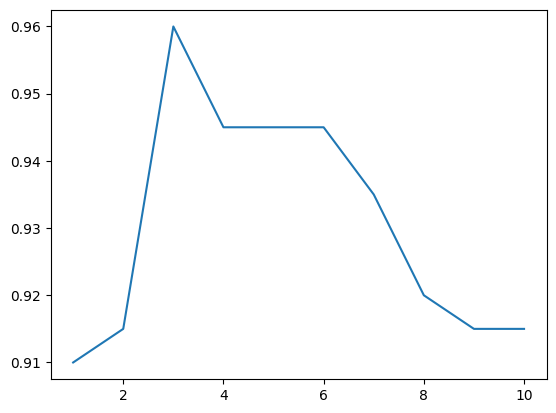

In [65]:
plt.plot(kk, sk)

In [21]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">پیش‌بینی داده‌های آموزشی</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
</div>


In [22]:
neigh.predict([X_test[10]])

array([0], dtype=uint8)

In [23]:
sample = 24

X = [X_test[sample]]

predicted_class = neigh.predict(X)

print ("Sample {} is a {}, and you prediction is: {}.".format(sample, y_test[sample], predicted_class[0]))

Sample 24 is a 9, and you prediction is: 9.


In [24]:
print(neigh.predict_proba(X))

[[0.         0.         0.         0.         0.         0.
  0.33333333 0.         0.         0.66666667]]


<div style="direction:rtl;text-align:right;font-family:Tahoma">
مثال بالا را با sample سوم تست کنید. و خروجی را تشریح کنید.
<br>
predict_proba چه احتمالاتی را برگردانده؟ کدام کلاس به عنوان پیش‌بینی مدل انتخاب شده؟
</div>

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">پیش‌بینی چندین داده آزمون</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
</div>


In [25]:
pred_classes = neigh.predict(X_test)
pred_classes

array([7, 2, 3, 1, 5, 5, 4, 7, 3, 2, 0, 8, 8, 0, 3, 9, 3, 6, 7, 4, 0, 3,
       6, 3, 9, 2, 7, 5, 2, 9, 7, 5, 5, 8, 9, 6, 5, 1, 4, 8, 8, 4, 2, 7,
       1, 2, 7, 9, 0, 3, 7, 4, 7, 5, 2, 9, 8, 2, 9, 8, 8, 6, 6, 6, 7, 6,
       2, 4, 1, 4, 4, 5, 9, 1, 8, 2, 0, 5, 6, 2, 4, 3, 2, 7, 7, 7, 7, 1,
       8, 1, 7, 8, 7, 7, 8, 9, 3, 2, 3, 1, 0, 2, 9, 7, 3, 5, 5, 0, 0, 2,
       6, 7, 9, 3, 9, 9, 8, 7, 9, 2, 5, 2, 5, 5, 9, 6, 9, 2, 0, 3, 7, 6,
       5, 2, 9, 0, 4, 1, 8, 2, 2, 3, 0, 2, 9, 3, 8, 6, 7, 0, 9, 9, 0, 7,
       6, 1, 4, 7, 9, 3, 7, 0, 7, 1, 9, 4, 7, 3, 4, 1, 5, 6, 7, 9, 1, 3,
       5, 4, 5, 7, 4, 1, 3, 3, 1, 2, 5, 3, 8, 9, 6, 7, 7, 2, 3, 0, 1, 4,
       9, 5], dtype=uint8)

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">ارزیابی</div>

In [26]:
np.mean(pred_classes == y_test)

0.96

In [27]:
acc = neigh.score(X_test, y_test)
print ("Accuracy is %.2f %%" %(acc*100))

Accuracy is 96.00 %


In [33]:
for i in range(0,10):
  neighb = KNeighborsClassifier(n_neighbors=kk[i])
  neighb.fit(X_train, y_train)
  accu = neigh.score(X_test, y_test)
  sk[i]=accu

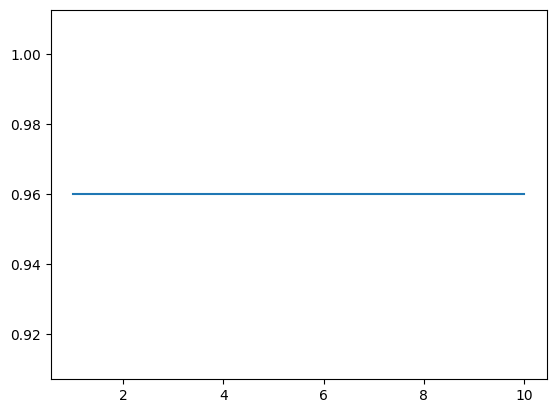

In [34]:
plt.plot(kk, sk)

In [67]:
s=np.array([2, 5, 10, 20, 50, 100, 200, 500])

In [72]:
for i in range(0,8):
  X_train, y_train, X_test, y_test = load_hoda(size=s)
  nei = KNeighborsClassifier(n_neighbors=3)
  nei.fit(X_train, y_train)
  accu = nei.score(X_test, y_test)
  sk[i]=accu

error: OpenCV(4.10.0) :-1: error: (-5:Bad argument) in function 'resize'
> Overload resolution failed:
>  - Can't parse 'dsize'. Sequence item with index 0 has a wrong type
>  - Can't parse 'dsize'. Sequence item with index 0 has a wrong type
